In [3]:
import requests
import pandas as pd
import openpyxl
import numpy as np
import pycountry
url= "https://ghoapi.azureedge.net/api/NCD_BMI_30C"
obesity_adults=requests.get(url)
data=obesity_adults.json()
df=pd.DataFrame(data["value"])
#print(df.head())
url1="https://ghoapi.azureedge.net/api/NCD_BMI_PLUS2C"
obesity_kids=requests.get(url1)
data1=obesity_kids.json()
df1=pd.DataFrame(data1["value"])
print(df1.head())

url2="https://ghoapi.azureedge.net/api/NCD_BMI_18C"
Malnutri_adults=requests.get(url2)
data2=Malnutri_adults.json()
df2=pd.DataFrame(data2["value"])
url3="https://ghoapi.azureedge.net/api/NCD_BMI_MINUS2C"
Malnutri_kids=requests.get(url3)
data3=Malnutri_kids.json()
df3=pd.DataFrame(data3["value"])



    Id   IndicatorCode SpatialDimType SpatialDim ParentLocationCode  \
0  169  NCD_BMI_PLUS2C        COUNTRY        URY                AMR   
1  541  NCD_BMI_PLUS2C        COUNTRY        AND                EUR   
2  565  NCD_BMI_PLUS2C        COUNTRY        DOM                AMR   
3  642  NCD_BMI_PLUS2C        COUNTRY        ATG                AMR   
4  661  NCD_BMI_PLUS2C        COUNTRY        TKL                WPR   

  TimeDimType   ParentLocation Dim1Type      Dim1  TimeDim  ... DataSourceDim  \
0        YEAR         Americas      SEX  SEX_BTSX     2014  ...          None   
1        YEAR           Europe      SEX   SEX_MLE     1993  ...          None   
2        YEAR         Americas      SEX  SEX_FMLE     1995  ...          None   
3        YEAR         Americas      SEX  SEX_FMLE     1997  ...          None   
4        YEAR  Western Pacific      SEX  SEX_FMLE     2011  ...          None   

              Value NumericValue       Low      High Comments  \
0  16.6 [14.1-19.3]  

In [4]:
df['age_group']='Adult'
df1['age_group']='child'
df2['age_group']='Adult'
df3['age_group']='child'
df_obesity=pd.concat([df,df1],ignore_index=True)
df_malnutrition=pd.concat([df2,df3],ignore_index=True)
df_obesity_filtered=df_obesity[df_obesity['TimeDim'].between(2012,2022)]
df_obesity_=df_obesity_filtered[['ParentLocation','TimeDim','Dim1','Low','High','NumericValue','SpatialDim','age_group']].rename(columns=
    {'ParentLocation': 'Region','TimeDim': 'Year','Dim1': 'Gender','Low': 'LowerBound','High': 'UpperBound','SpatialDim': 'Country'})
df_malnutrition_filtered=df_malnutrition[df_malnutrition['TimeDim'].between(2012,2022)]
df_malnutrition_=df_malnutrition_filtered[['ParentLocation','TimeDim','Dim1','Low','High','NumericValue','SpatialDim','age_group']].rename(columns=
    {'ParentLocation': 'Region','TimeDim': 'Year','Dim1': 'Gender','Low': 'LowerBound','High': 'UpperBound','SpatialDim': 'Country'})
df_obesity_['Gender']=df_obesity_['Gender'].replace({'SEX_MLE':'Male','SEX_FMLE':'Female','SEX_BTSX':'Both'})
df_malnutrition_['Gender']=df_malnutrition_['Gender'].replace({'SEX_MLE':'Male','SEX_FMLE':'Female','SEX_BTSX':'Both'})


In [5]:
df_obesity_['CI_Width']=df_obesity_['UpperBound']-df_obesity_['LowerBound']
df_malnutrition_['CI_Width']=df_malnutrition_['UpperBound']-df_malnutrition_['LowerBound']
conditions=[(df_obesity_['NumericValue']>=30),
            (df_obesity_['NumericValue']>=25) & (df_obesity_['NumericValue']<=29.9),
            (df_obesity_['NumericValue']<25)]
choices=['High','Moderate','Low']
df_obesity_['obesity_level']=np.select(conditions,choices,default='unknown')
MLconditions=[(df_malnutrition_['NumericValue']>=20),
              (df_malnutrition_['NumericValue']>=10)&(df_malnutrition_['NumericValue']<=19.9),
              (df_malnutrition_['NumericValue']<10)]
MLchoices=['High','Moderate','Low']
df_malnutrition_['malnutrition_level']=np.select(MLconditions,MLchoices,default='unknown')


In [6]:
special_cases = {
    'GLOBAL': 'Global',
    'WB_LMI': 'Low & Middle Income',
    'WB_HI': 'High Income',
    'WB_LI': 'Low Income',
    'EMR': 'Eastern Mediterranean Region',
    'EUR': 'Europe',
    'AFR': 'Africa',
    'SEAR': 'South-East Asia Region',
    'WPR': 'Western Pacific Region',
    'AMR': 'Americas Region',
    'WB_UMI': 'Upper Middle Income'
}

df_malnutrition_['Country']=df_malnutrition_['Country'].apply(lambda x:(pycountry.countries.get(alpha_3=x).name if pycountry.countries.get(alpha_3=x) else special_cases.get(x,'unknown')))
df_obesity_['Country']=df_obesity_['Country'].apply(lambda x:(pycountry.countries.get(alpha_3=x).name if pycountry.countries.get(alpha_3=x) else special_cases.get(x,'unknown')))

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects  as go
import plotly.io as pio




In [8]:
print(df_obesity_.shape)
print(df_malnutrition_.shape)
print(df_obesity_.info())
print(df_malnutrition_.info())


(27720, 10)
(27720, 10)
<class 'pandas.core.frame.DataFrame'>
Index: 27720 entries, 1 to 83154
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Region         26268 non-null  object 
 1   Year           27720 non-null  int64  
 2   Gender         27720 non-null  object 
 3   LowerBound     27720 non-null  float64
 4   UpperBound     27720 non-null  float64
 5   NumericValue   27720 non-null  float64
 6   Country        27720 non-null  object 
 7   age_group      27720 non-null  object 
 8   CI_Width       27720 non-null  float64
 9   obesity_level  27720 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 2.3+ MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 27720 entries, 0 to 83159
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Region              26268 non-null  object 
 1   Year                2

In [9]:
print(df_malnutrition_.isnull().sum())
print(df_obesity_.isnull().sum())

Region                1452
Year                     0
Gender                   0
LowerBound               0
UpperBound               0
NumericValue             0
Country                  0
age_group                0
CI_Width                 0
malnutrition_level       0
dtype: int64
Region           1452
Year                0
Gender              0
LowerBound          0
UpperBound          0
NumericValue        0
Country             0
age_group           0
CI_Width            0
obesity_level       0
dtype: int64


In [10]:
df_malnutrition_.fillna(np.nan,method=None,axis=None,inplace=True)
df_obesity_.fillna(np.nan,method=None,axis=None,inplace=True)

<Axes: xlabel='CI_Width', ylabel='Count'>

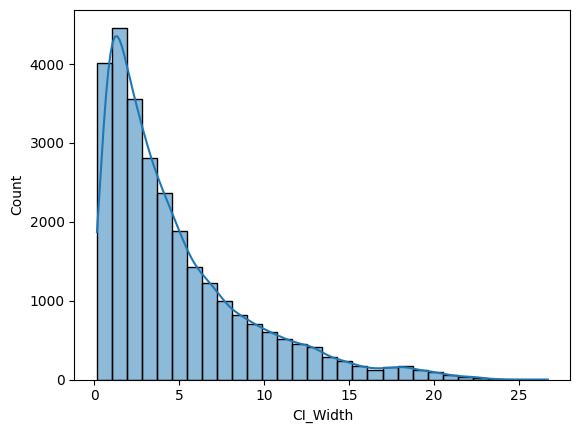

In [11]:
sns.histplot(df_malnutrition_['CI_Width'],kde=True,bins=30)

<Axes: xlabel='CI_Width', ylabel='Count'>

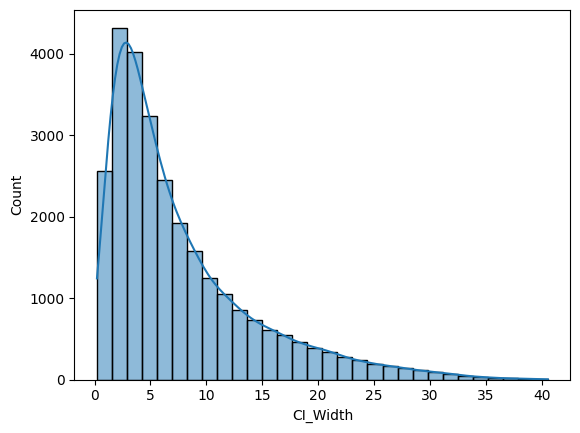

In [12]:
sns.histplot(df_obesity_['CI_Width'],kde=True,bins=30)

In [13]:
df_malnutrition_.describe()


,Year,LowerBound,UpperBound,NumericValue,CI_Width
count,27720.000000,27720.000000,27720.000000,27720.000000,27720.000000
mean,2017.000000,3.397094,8.147889,5.354451,4.750795
std,3.162335,3.908061,6.443692,4.811220,4.257684
min,2012.000000,0.023700,0.354830,0.175310,0.166680
25%,2014.000000,1.053662,3.143305,2.039283,1.603222
50%,2017.000000,1.907975,6.095555,3.597790,3.351095
75%,2020.000000,4.186443,11.526302,7.335245,6.530875
max,2022.000000,31.365400,43.680290,35.894110,26.701740


In [14]:
df_obesity_.describe()

,Year,LowerBound,UpperBound,NumericValue,CI_Width
count,27720.000000,27720.000000,27720.000000,27720.000000,27720.000000
mean,2017.000000,9.393155,17.068489,12.761041,7.675334
std,3.162335,9.893854,12.395013,10.858925,6.616899
min,2012.000000,0.077540,0.547850,0.265670,0.216700
25%,2014.000000,2.354430,7.875503,4.753960,2.926715
50%,2017.000000,6.506535,13.704380,9.944540,5.480535
75%,2020.000000,12.697755,23.986050,17.482418,10.338880
max,2022.000000,74.365370,87.868510,80.609250,40.554060


<Axes: xlabel='obesity_level', ylabel='Region'>

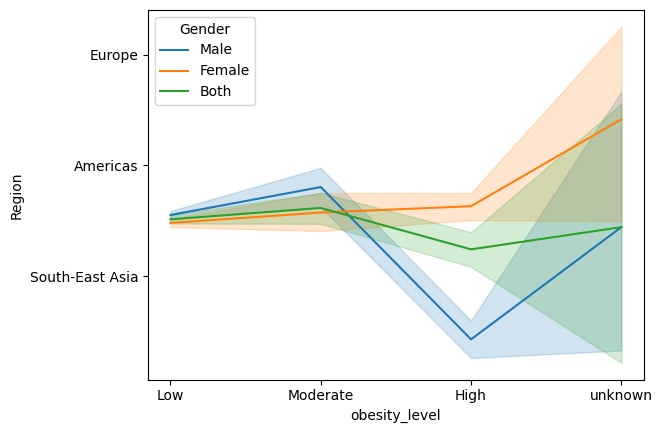

In [15]:
sns.lineplot(data=df_obesity_,x=df_obesity_['obesity_level'],y=df_obesity_['Region'],hue='Gender')

<Axes: xlabel='malnutrition_level', ylabel='Region'>

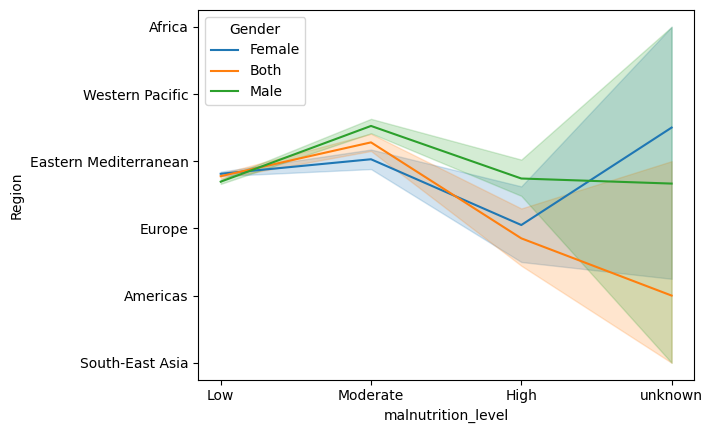

In [16]:
sns.lineplot(data=df_malnutrition_,x=df_malnutrition_['malnutrition_level'],y=df_malnutrition_['Region'],hue='Gender')

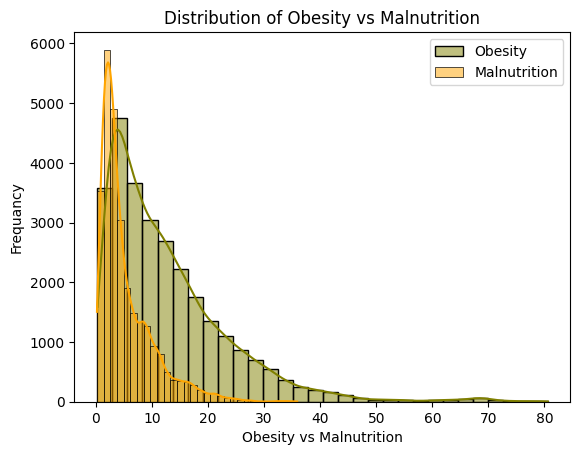

In [17]:
sns.histplot(df_obesity_['NumericValue'],kde=True,bins=30,color='olive',label='Obesity')
sns.histplot(df_malnutrition_['NumericValue'],kde=True,bins=30,color='orange',label='Malnutrition')
plt.xlabel('Obesity vs Malnutrition')
plt.ylabel('Frequancy')
plt.title('Distribution of Obesity vs Malnutrition')
plt.legend()
plt.show()

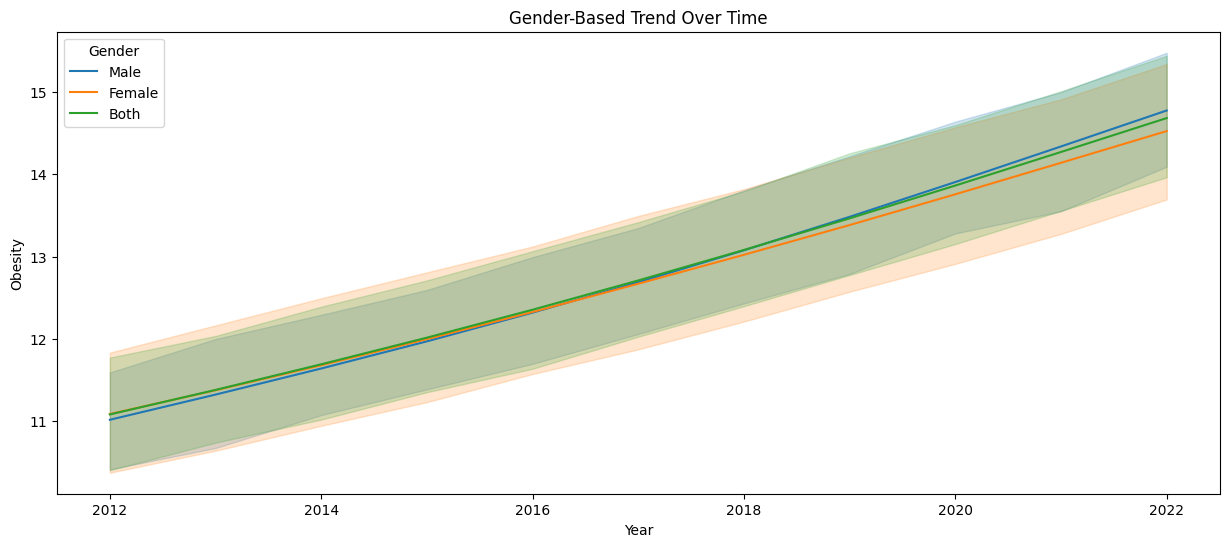

In [18]:

plt.figure(figsize=(15, 6))
sns.lineplot(data=df_obesity_, 
             x='Year', 
             y='NumericValue', 
             hue='Gender',         
             )
plt.xlabel('Year')
plt.ylabel('Obesity')
plt.title('Gender-Based Trend Over Time')
plt.show()

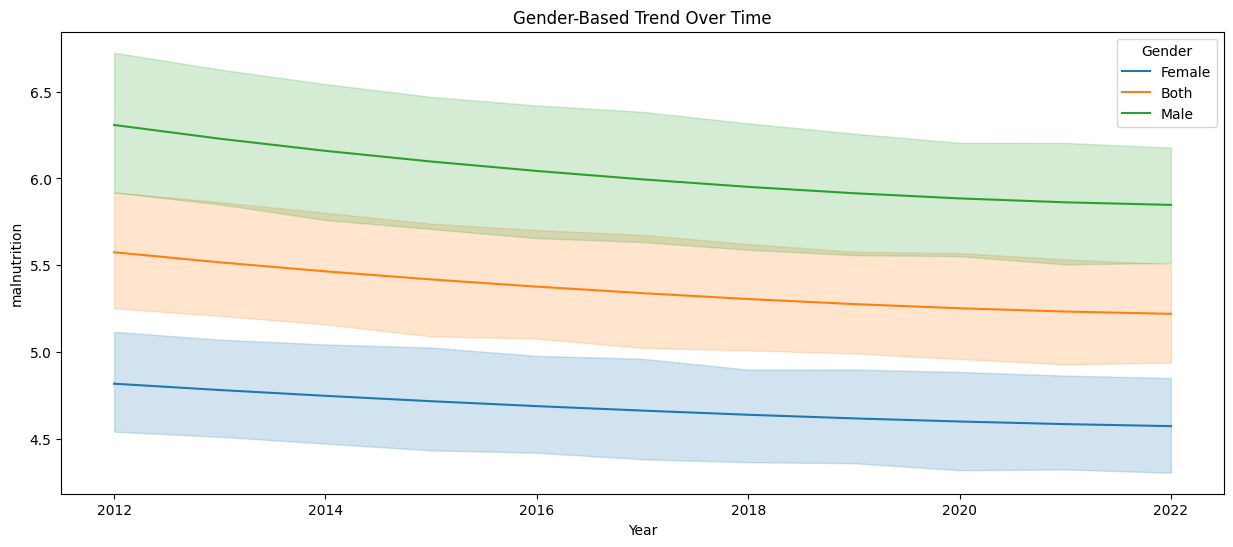

In [19]:
plt.figure(figsize=(15, 6))
sns.lineplot(data=df_malnutrition_, 
             x='Year', 
             y='NumericValue', 
             hue='Gender',         
             )
plt.xlabel('Year')
plt.ylabel('malnutrition')
plt.title('Gender-Based Trend Over Time')
plt.show()

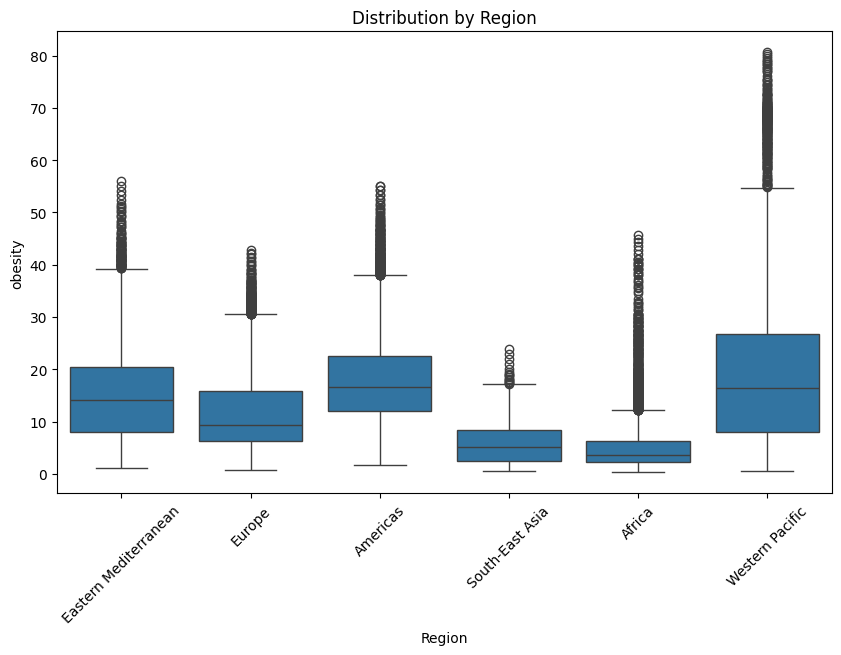

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Region', y='NumericValue', data=df_obesity_)
plt.xticks(rotation=45)
plt.ylabel('obesity')
plt.title('Distribution by Region')
plt.show()

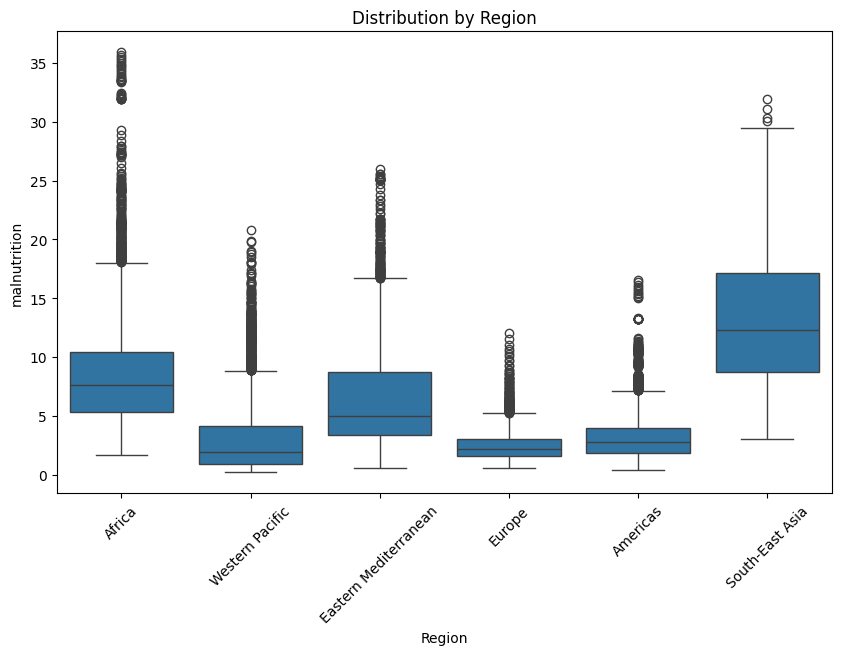

In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Region', y='NumericValue', data=df_malnutrition_)
plt.xticks(rotation=45)
plt.ylabel('malnutrition')
plt.title('Distribution by Region')
plt.show()

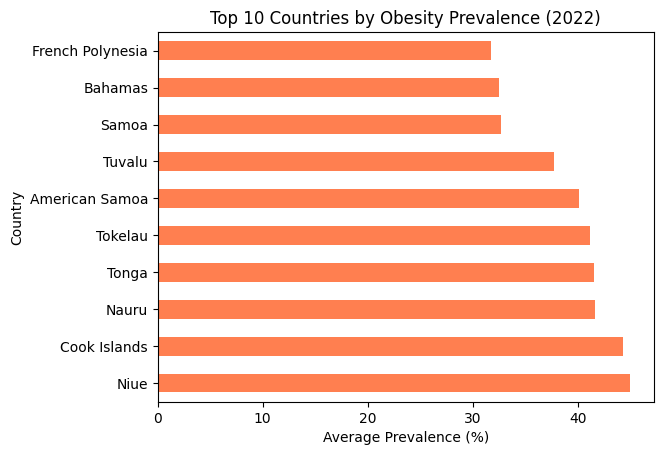

In [22]:
top_obesity = df_obesity_[df_obesity_['Year'] == 2022].groupby('Country')['NumericValue'].mean().nlargest(10)
top_obesity.plot(kind='barh', color='coral')
plt.title('Top 10 Countries by Obesity Prevalence (2022)')
plt.xlabel('Average Prevalence (%)')
plt.show()

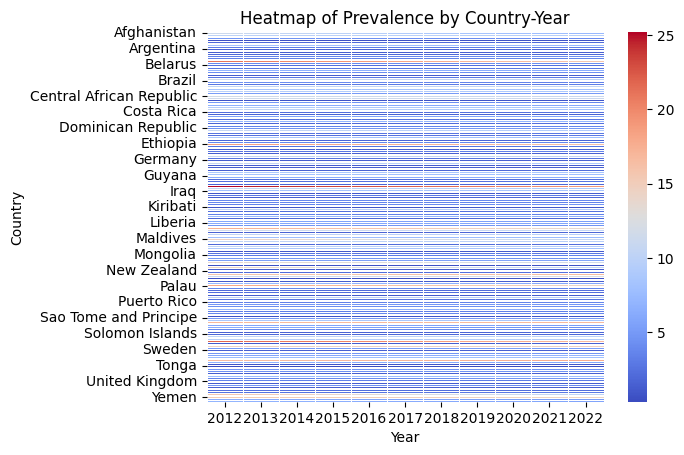

In [23]:
pivot = df_malnutrition_.pivot_table(values='NumericValue', index='Country', columns='Year', aggfunc='mean')
sns.heatmap(pivot, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Prevalence by Country-Year')
plt.show()

In [28]:
df=df_obesity_.sample(n=1000)

In [30]:
import plotly.io as pio
pio.renderers.default = 'browser'
fig = px.line(df, x='Year', y='NumericValue', color='Region', line_group='Country',
              title='Interactive Obesity Trends by Region')
fig.show()

In [26]:
import pymysql
connection=pymysql.connect(host='localhost',
                      user='root',
                      password='Mithran@21',
                      database='training')
cursur=connection.cursor()


In [ ]:
cursur.execute("""create table obesity
               (Region varchar(100),
               Year int,
               Gender varchar(100),
               LowerBound float,
               UpperBound float,
               NumericValue float,
               Country varchar(100),
               age_group varchar(100),
               CI_Width float,
               obesity_level varchar(100));""")
connection.commit()


In [ ]:
cursur.execute("""create table malnutrition
               (Region varchar(100),
               Year int,
               Gender varchar(100),
               LowerBound float,
               UpperBound float,
               NumericValue float,
               Country varchar(100),
               age_group varchar(100),
               CI_Width float,
               malnutrition_level varchar(100));""")
connection.commit()

In [ ]:
insert="""insert into obesity values(%s,%s,%s,%s,%s,%s,%s,%s,%s,%s)"""
for index,row in df_obesity_.iterrows():
    data=(str(row['Region']),
          int(row['Year']),
          str(row['Gender']),
          float(row['LowerBound']),
          float(row['UpperBound']),
          float(row['NumericValue']),
          str(row['Country']),
          str(row['age_group']),
          float(row['CI_Width']),
          str(row['obesity_level']))
    cursur.execute(insert,data)
connection.commit()

In [ ]:
insert="""insert into malnutrition values(%s,%s,%s,%s,%s,%s,%s,%s,%s,%s)"""
for index,row in df_malnutrition_.iterrows():
    data=(str(row['Region']),
          int(row['Year']),
          str(row['Gender']),
          float(row['LowerBound']),
          float(row['UpperBound']),
          float(row['NumericValue']),
          str(row['Country']),
          str(row['age_group']),
          float(row['CI_Width']),
          str(row['malnutrition_level']))
    cursur.execute(insert,data)
connection.commit()

In [ ]:
cursur.execute("""select Region,Year,avg(NumericValue) as Average_obesity
               from training.obesity
               where year=2022 
               and Region <> 'nan'
               group by Region,Year
               order by Average_obesity desc
               limit 5; """)
Avg_obesity_region=cursur.fetchall()
Avg_obesity_region_table=pd.DataFrame(Avg_obesity_region,columns=['Region','Year','obesity_level'])
print(Avg_obesity_region_table)

                  Region  Year  obesity_level
0        Western Pacific  2022      23.009388
1               Americas  2022      21.213601
2  Eastern Mediterranean  2022      18.126910
3                 Europe  2022      12.987338
4        South-East Asia  2022       7.702034


In [ ]:
cursur.execute("""select Country,NumericValue 
               from training.obesity
               group by Country,NumericValue
               order by Numericvalue desc
               limit 5;""")
highest_obesity_estimates=cursur.fetchall()
highest_obesity_estimates_table=pd.DataFrame(highest_obesity_estimates,columns=['Country','Obesity_estimates'])
print(highest_obesity_estimates_table)


          Country  Obesity_estimates
0  American Samoa            80.6093
1  American Samoa            80.3169
2  American Samoa            79.9699
3  American Samoa            79.6005
4  American Samoa            79.2050


In [ ]:
cursur.execute("""select Country,avg(NumericValue) as mean_estimate
               from training.obesity
               where country='India';"""
               )
Mean_indianobesity_estimate=cursur.fetchall()
Mean_indianobesity_estimate_table=pd.DataFrame(Mean_indianobesity_estimate,columns=['Country','avg_estimate'])
print(Mean_indianobesity_estimate_table)

  Country  avg_estimate
0   India      3.429781


In [ ]:
cursur.execute("""select Gender,avg(NumericValue) as mean_estimate
               from training.obesity
               group by Gender;"""
               )
Average_obesity_gender=cursur.fetchall()
Average_obesity_gender_table=pd.DataFrame(Average_obesity_gender,columns=['Gender','Estimate'])
print(Average_obesity_gender_table)

   Gender   Estimate
0    Male  12.776696
1  Female  12.724456
2    Both  12.781970


In [ ]:
cursur.execute("""select Country,count(Country) as Numbers,obesity_level,age_group
               from training.obesity
               group by Country,age_group,obesity_level;""")
country_count=cursur.fetchall()
country_count_table=pd.DataFrame(country_count,columns=['country','Numbers','Obesity_level','age_group'])
print(country_count_table)


                             country  Numbers Obesity_level age_group
0          Iran, Islamic Republic of       22           Low     Adult
1                               Iraq        9      Moderate     Adult
2                          Greenland       16      Moderate     Adult
3                            Armenia        7          High     Adult
4                              Malta       33          High     Adult
..                               ...      ...           ...       ...
635  Bolivia, Plurinational State of        2      Moderate     child
636                     Cook Islands        1       unknown     child
637                             Peru        1      Moderate     child
638                          Tokelau        1       unknown     child
639                          Uruguay        1      Moderate     child

[640 rows x 4 columns]


In [ ]:
cursur.execute("""select Country,CI_Width
               from training.obesity
               order by CI_Width desc
               limit 5;""")
least_reliable_countries=cursur.fetchall()
cursur.execute("""select Country,CI_Width
               from training.obesity
               order by CI_Width
               limit 5;""")
most_consistent_countries=cursur.fetchall()
least_reliable_countries_table=pd.DataFrame(least_reliable_countries,columns=['Country','CI_width'])
most_consistent_countries_table=pd.DataFrame(most_consistent_countries,columns=['Country','CI_width'])
print(least_reliable_countries_table)
print(most_consistent_countries_table)


          Country  CI_width
0           Haiti   40.5541
1         Bermuda   40.0797
2     Puerto Rico   40.0322
3  American Samoa   39.9541
4         Grenada   39.6968
    Country  CI_width
0  Viet Nam   0.21670
1    Global   0.24580
2  Viet Nam   0.24942
3    Global   0.25776
4    Global   0.25829


In [ ]:
cursur.execute("""select age_group,avg(NumericValue) as Average_obesity
               from training.obesity
               group by age_group;""")
Average_obesity_agewise=cursur.fetchall()
Average_obesity_agewise_table=pd.DataFrame(Average_obesity_agewise,columns=['age_group','Average_obesity'])
print(Average_obesity_agewise_table)

  age_group  Average_obesity
0     Adult        21.833224
1     child         9.736980


In [ ]:
cursur.execute("""select Country,CI_Width,avg(CI_Width) as Average_obesity
               from training.obesity
               group by country,CI_width
               order by Average_obesity,CI_width
               limit 10;""")
low_obesity_countries=cursur.fetchall()
low_obesity_countries_table=pd.DataFrame(low_obesity_countries,columns=['Country','CI_Width','Average_obesity'])
print(low_obesity_countries_table)


    Country  CI_Width  Average_obesity
0  Viet Nam   0.21670          0.21670
1    Global   0.24580          0.24580
2  Viet Nam   0.24942          0.24942
3    Global   0.25776          0.25776
4    Global   0.25829          0.25829
5  Ethiopia   0.26730          0.26730
6    Global   0.26737          0.26737
7    Global   0.26993          0.26993
8  Ethiopia   0.27028          0.27028
9  Ethiopia   0.27681          0.27681


In [ ]:
cursur.execute("""select Year,count(case when Gender='Female' then 1 end) as Female_count,
               count(case when Gender='Male' then 1 end) as Male_count
               from training.obesity
               where Gender <> 'Both'
               group by Year
               order by Year;""")
count_=cursur.fetchall()
count_table=pd.DataFrame(count_,columns=['Year','Female_count','Male_count'])
print(count_table)

    Year  Female_count  Male_count
0   2012           840         840
1   2013           840         840
2   2014           840         840
3   2015           840         840
4   2016           840         840
5   2017           840         840
6   2018           840         840
7   2019           840         840
8   2020           840         840
9   2021           840         840
10  2022           840         840


In [ ]:
cursur.execute("""select Year,Country,avg(NumericValue)/100 as average_obesity_percentage
               from training.obesity
               where Country = 'Global'
               group by Year,Country
               order by year;""")
obesity_percentage=cursur.fetchall()
obesity_percentage_table=pd.DataFrame(obesity_percentage,columns=['Year','Country','average_obesity_percentage'])
print(obesity_percentage_table)

    Year Country  average_obesity_percentage
0   2012  Global                    0.072244
1   2013  Global                    0.074727
2   2014  Global                    0.077335
3   2015  Global                    0.080074
4   2016  Global                    0.082966
5   2017  Global                    0.086045
6   2018  Global                    0.089321
7   2019  Global                    0.092780
8   2020  Global                    0.096381
9   2021  Global                    0.100095
10  2022  Global                    0.103969


In [ ]:
cursur.execute("""select age_group, avg(NumericValue) as Avg_malnutrition
               from training.malnutrition
               group by age_group;""")
Avg_malnutrition_=cursur.fetchall()
Avg_malnutrition_table=pd.DataFrame(Avg_malnutrition_,columns=['age_group','Avg_malnutrition'])
print(Avg_malnutrition_table)

  age_group  Avg_malnutrition
0     Adult          5.940619
1     child          5.159062


In [ ]:
cursur.execute("""select Country,avg(NumericValue) as mean_estimate
               from training.malnutrition
               group by Country
               order by mean_estimate desc
               limit 5;"""
               )
highest_malnutrition=cursur.fetchall()
highest_malnutrition_table=pd.DataFrame(highest_malnutrition,columns=['Country','mean_estimate'])
print(highest_malnutrition_table)

                  Country  mean_estimate
0                   India      22.142361
1  South-East Asia Region      19.238903
2              Bangladesh      18.245769
3               Sri Lanka      17.871908
4                 Eritrea      17.472509


In [ ]:
cursur.execute("""select Region,Year,Country,avg(NumericValue)as avg_malnutrition,Gender,age_group,malnutrition_level 
               from training.malnutrition
               where Region='Africa'
               Group by Year,malnutrition_level,Gender,Country,age_group
               order by Year;""")
Africa_mal_report=cursur.fetchall()
Africa_mal_report_table=pd.DataFrame(Africa_mal_report,columns=['Region','Year','Country','avg_malnutrition','Gender','age_group','malnutrition_level'])
print(Africa_mal_report_table)

      Region  Year                       Country  avg_malnutrition  Gender  \
0     Africa  2012      Central African Republic         21.544880    Both   
1     Africa  2012                       Eritrea         34.035290    Both   
2     Africa  2012                      Ethiopia         25.641300    Both   
3     Africa  2012                      Ethiopia         21.161289    Both   
4     Africa  2012                       Eritrea         35.894112  Female   
...      ...   ...                           ...               ...     ...   
3533  Africa  2022                   South Sudan         10.163630    Male   
3534  Africa  2022  Tanzania, United Republic of         12.421340    Male   
3535  Africa  2022  Tanzania, United Republic of         12.067900    Male   
3536  Africa  2022                        Uganda         12.142330    Male   
3537  Africa  2022                      Zimbabwe         10.383510    Male   

     age_group malnutrition_level  
0        Adult             

In [ ]:
cursur.execute("""select Gender,avg(NumericValue) as average_malnutrition
               from training.malnutrition
               group by Gender;""")
Gender_based_average_malnutrition=cursur.fetchall()
Gender_based_average_malnutrition_table=pd.DataFrame(Gender_based_average_malnutrition,columns=['Gender','average_malnutrition'])
print(Gender_based_average_malnutrition_table)

   Gender  average_malnutrition
0  Female              4.675483
1    Both              5.361553
2    Male              6.026317


In [ ]:
cursur.execute("""select age_group,avg(CI_Width)as Malnutrition_level_wise
               from training.malnutrition
               group by age_group;""")
Malnutrition_age_wise=cursur.fetchall()
Malnutrition_age_wise_table=pd.DataFrame(Malnutrition_age_wise,columns=['age_group','Malnutrition_level_wise'])
print(Malnutrition_age_wise_table)

  age_group  Malnutrition_level_wise
0     Adult                 3.693780
1     child                 5.103133


In [ ]:
cursur.execute("""select Year,Country,NumericValue
               from training.malnutrition
               where Country in('India','Nigeria','Brazil')
               group by Country,Year,NumericValue
               order by Year;""")
Yearly_malnutrition=cursur.fetchall()
Yearly_malnutrition_table=pd.DataFrame(Yearly_malnutrition,columns=['Year','Country','Malnutrion_value'])
print(Yearly_malnutrition_table)


     Year  Country  Malnutrion_value
0    2012    India          21.99770
1    2012  Nigeria           9.93363
2    2012    India          23.58450
3    2012    India          22.77070
4    2012  Nigeria           9.74946
..    ...      ...               ...
391  2022   Brazil           2.64391
392  2022  Nigeria          21.98100
393  2022    India          21.39490
394  2022   Brazil           2.61397
395  2022   Brazil           2.46357

[396 rows x 3 columns]


In [ ]:
cursur.execute("""select Region,avg(NumericValue) as avg_malnutrition
               from training.malnutrition
               where Region <> 'nan'
               group by Region
               order by avg_malnutrition;""")
lowest_malnutrition_region=cursur.fetchall()
lowest_malnutrition_region_table=pd.DataFrame(lowest_malnutrition_region,columns=['Region','avg_malnutrition'])
print(lowest_malnutrition_region_table)


                  Region  avg_malnutrition
0                 Europe          2.426759
1               Americas          3.174752
2        Western Pacific          3.220453
3  Eastern Mediterranean          6.661349
4                 Africa          8.502186
5        South-East Asia         13.283206


In [ ]:
cursur.execute("""select Country,
               min(NumericValue) as Min_mal,
               max(NumericValue) as Max_mal, 
               max(NumericValue)-min(NumericValue) as Difference
               from training.malnutrition 
               group by Country
               having Max_mal-Min_mal>0
               order by difference desc;""")
increasing_malnutrition_countries=cursur.fetchall()
increasing_malnutrition_countries_table=pd.DataFrame(increasing_malnutrition_countries,columns=['Countrty','Min_mal','Max_mal','Difference'])
print(increasing_malnutrition_countries_table)

           Countrty   Min_mal   Max_mal  Difference
0           Eritrea   7.86806  35.89410   28.026052
1          Ethiopia   7.55397  29.30410   21.750081
2           Somalia   4.68890  25.52170   20.832830
3             India  13.07350  31.90080   18.827341
4          Pakistan   8.21369  25.95060   17.736900
..              ...       ...       ...         ...
205    Cook Islands   0.44990   1.63716    1.187260
206            Peru   0.82517   1.98527    1.160100
207  American Samoa   0.24652   1.14696    0.900440
208            Niue   0.35336   1.24984    0.896480
209           Tonga   0.17531   1.06922    0.893910

[210 rows x 4 columns]


In [ ]:
cursur.execute("""select Year,
               min(NumericValue) as Min_mal,
               max(NumericValue) as Max_mal, 
               max(NumericValue)-min(NumericValue) as Difference
               from training.malnutrition 
               group by Year
               having Max_mal-Min_mal>0
               order by difference desc;""")
increasing_malnutrition_byYear=cursur.fetchall()
increasing_malnutrition_byYear_table=pd.DataFrame(increasing_malnutrition_byYear,columns=['Year','Min_mal','Max_mal','Difference'])
print(increasing_malnutrition_byYear_table)

    Year  Min_mal  Max_mal  Difference
0   2012  0.17531  35.8941   35.718802
1   2013  0.17642  35.6944   35.517939
2   2014  0.17777  35.4982   35.320429
3   2015  0.17844  35.3130   35.134510
4   2016  0.17880  35.1477   34.968890
5   2017  0.17929  34.9979   34.818608
6   2018  0.17980  34.8562   34.676439
7   2019  0.18043  34.7160   34.535570
8   2020  0.18199  34.5784   34.396459
9   2021  0.18472  34.4292   34.244510
10  2022  0.18817  34.2620   34.073781


In [ ]:
cursur.execute("""select Country,Year,NumericValue,LowerBound,UpperBound,CI_Width,
               case when CI_Width>5 then '🚩'
               else '✓'
               end as Flag
               from training.malnutrition
               order by CI_Width desc;""" )
High_CI_Width_flags=cursur.fetchall()
High_CI_Width_flags_table=pd.DataFrame(High_CI_Width_flags,columns=['Country','Year','mean_estimate','Low_CI','High_CI','CI_Width','Flag'])
print(High_CI_Width_flags_table)

              Country  Year  mean_estimate   Low_CI   High_CI  CI_Width Flag
0             Senegal  2022       16.94180  5.73517  32.43690  26.70170    🚩
1             Senegal  2021       16.99200  6.16167  31.84100  25.67930    🚩
2             Senegal  2020       17.04640  6.61769  31.20410  24.58640    🚩
3          Mauritania  2022       16.08090  5.94490  29.75540  23.81050    🚩
4             Senegal  2019       17.10590  6.98011  30.44700  23.46690    🚩
...               ...   ...            ...      ...       ...       ...  ...
27715     High Income  2012        2.07647  1.98287   2.17396   0.19109    ✓
27716  United Kingdom  2015        0.85976  0.76934   0.95435   0.18501    ✓
27717  United Kingdom  2014        0.85238  0.76525   0.94218   0.17693    ✓
27718  United Kingdom  2013        0.84502  0.76068   0.93008   0.16940    ✓
27719  United Kingdom  2012        0.83843  0.75643   0.92311   0.16668    ✓

[27720 rows x 7 columns]


In [ ]:
cursur.execute("""select obesity.Country,
               avg(obesity.NumericValue) as obesityvalue,
               avg(malnutrition.NumericValue) as malnutritionvalue
               from training.obesity
               join training.malnutrition on obesity.Country = malnutrition.Country
               where obesity.Country in ('India','Eritrea','Ethiopia','Somalia','Pakistan')
               group by obesity.Country;""")
obe_mal_com=cursur.fetchall()
obe_mal_com_table=pd.DataFrame(obe_mal_com,columns=['Country','Obesity_value','Malnutrition_value']) 
print(obe_mal_com_table)

    Country  Obesity_value  Malnutrition_value
0   Eritrea       2.770560           17.472509
1     India       3.429781           22.142361
2   Somalia       4.676985           10.032605
3  Pakistan       8.042644           16.123748
4  Ethiopia       1.491995           17.392328


In [ ]:
cursur.execute("""select obesity.Country,obesity.Gender,
               avg(obesity.NumericValue) as obesityvalue,
               avg(malnutrition.NumericValue) as malnutritionvalue
               from training.obesity
               join training.malnutrition on obesity.Country = malnutrition.Country
               and obesity.Gender = malnutrition.Gender
               group by obesity.Country,obesity.Gender
               order by obesity.Country,obesity.Gender;""")
obe_mal_gender=cursur.fetchall()
obe_mal_gender_table=pd.DataFrame(obe_mal_gender,columns=['Country','age_group','Obesity_value','Malnutrition_value']) 
print(obe_mal_gender_table)

         Country age_group  Obesity_value  Malnutrition_value
0    Afghanistan      Both       7.762614            9.300868
1    Afghanistan    Female       8.629136            7.111470
2    Afghanistan      Male       6.898345           11.379066
3         Africa      Both       4.684229            9.747832
4         Africa    Female       5.600578            7.481261
..           ...       ...            ...                 ...
625       Zambia    Female       5.592314            4.784326
626       Zambia      Male       3.441511            6.591892
627     Zimbabwe      Both       4.150785            6.215271
628     Zimbabwe    Female       5.611687            3.328232
629     Zimbabwe      Male       2.347178            9.315194

[630 rows x 4 columns]


In [ ]:
cursur.execute("""select obesity.Region,
               avg(obesity.NumericValue) as obesityvalue,
               avg(malnutrition.NumericValue) as malnutritionvalue
               from training.obesity
               join training.malnutrition on obesity.Region = malnutrition.Region
               and obesity.Region in ('Africa','Americas')
               group by obesity.Region;""")
obe_mal_Region=cursur.fetchall()
obe_mal_Region_table=pd.DataFrame(obe_mal_Region,columns=['Region','Obesity_value','Malnutrition_value']) 
print(obe_mal_Region_table)

     Region  Obesity_value  Malnutrition_value
0    Africa       5.415204            8.502186
1  Americas      18.402103            3.174752


In [ ]:
cursur.execute("""select obesity.Country,
               avg(obesity.NumericValue) as obesityvalue,
               avg(malnutrition.NumericValue) as malnutritionvalue
               from training.obesity
               join training.malnutrition on obesity.Country = malnutrition.Country
               group by obesity.Country
               having obesityvalue > malnutritionvalue
               order by obesityvalue desc,
               malnutritionvalue asc;""")
obe_mal_diff=cursur.fetchall()
obe_mal_diff_table=pd.DataFrame(obe_mal_diff,columns=['Country','Obesity_value','Malnutrition_value']) 
print(obe_mal_diff_table)

                   Country  Obesity_value  Malnutrition_value
0                     Niue      40.664874            0.725408
1             Cook Islands      39.917173            0.752575
2                    Nauru      38.512101            0.692260
3                  Tokelau      37.960966            0.901380
4           American Samoa      36.892015            0.730369
..                     ...            ...                 ...
142           Turkmenistan       6.515882            4.452971
143                 France       6.494721            3.097551
144  Sao Tome and Principe       5.968429            4.981098
145               Cameroon       5.291436            5.092833
146                  Japan       4.000332            3.839637

[147 rows x 3 columns]


In [ ]:
cursur.execute("""select obesity.age_group,
               avg(obesity.NumericValue) as obesityvalue,
               avg(malnutrition.NumericValue) as malnutritionvalue
               from training.obesity
               join training.malnutrition on obesity.age_group = malnutrition.age_group
               group by obesity.age_group
               order by obesity.age_group;""")
obe_mal_age=cursur.fetchall()
obe_mal_age_table=pd.DataFrame(obe_mal_age,columns=['Country','Obesity_value','Malnutrition_value']) 
print(obe_mal_age_table)

  Country  Obesity_value  Malnutrition_value
0   Adult      21.833224            5.940619
1   child       9.736980            5.159062
